
# Review: Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>

<a id='intro'></a>
## Introduction

> * The data set is Medical Appointment No shows. <br>
> * The data set variables are self explanatory. The variables in the data set are 'Patient ID', 'AppointmentID', 'Gender', 'ScheduleDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-Show'. <br>
> * No-Show as Yes corresponds to people who did not turn up for the doctor visit and No-Show as No turned up for the doctor visit.

## Important information:

1. Explain your findings and the steps you've followed using the Markdown cells. Create Markdown cells wherever necessary
2. Double-click the markdown cells to edit them and add your inferences
3. Add necessary code cells for your task. You are not restricted to the cells created before hand.


### Steps to be followed:
1. Load the data
2. Variable Identification.
3. Check for cleanliness.
4. Trim and clean the data.
5. Feature Selection.
6. Modification of features if needed.


In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import re

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### Loading the data

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
dataset=pd.read_csv("no-show_appointments.csv")
dataset.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
dataset.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

From above we can see that there are no Null values or missing values therefore we move to the next step

In [5]:
dataset.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [6]:
# Create a summary of the data.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
max(dataset['Age'])

115

In [8]:
min(dataset['Age'])

-1

Min is -1 therefore we will remove the row which contains that and max age is 115 which is not a big issue and we will deal with it later

In [9]:
l=[]
for i in range(len(dataset['Age'])):
    if(dataset['Age'][i]<0):
        l.append(i)

In [10]:
l

[99832]

In [11]:
dataset['Age'][99832]=1

C:\Users\Eshika\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Minimum age in the dataset is negative(something to be taken care of) and max age is above 100.

### Variable Identification
* Identifying the target variable(dependent variable) and the predictor variables(independent variables) which affect the status of the target variable.

The target variable(y) is the no_show column of the dataset and predictor variable(X) are the columns 3rd to second last from the dataset

In [12]:
y=dataset.iloc[:,13]
y

0         No
1         No
2         No
3         No
4         No
          ..
110522    No
110523    No
110524    No
110525    No
110526    No
Name: No-show, Length: 110527, dtype: object

In [13]:
X=dataset.iloc[:,:-1]
X

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1


#### Mention your target variable(s) in this markdown cell and specify the predictor variable(s) you'll use for the analysis


### Type of Variable Classified:
#### Predictor Variables: no_show

<br>

#### Target Variable (Independent Variable): PatientId,	AppointmentID, Gender	,ScheduledDay,	AppointmentDay,	Age,	Neighbourhood,	Scholarship,	Hipertension,	Diabetes,	Alcoholism,	Handcap,	SMS_received

<br>

### Classify the features based on dataype

In [14]:
# Check the data types of each column (features)
X.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
dtype: object

In [15]:
y.dtypes

dtype('O')

### Write the features categorized by data types here:
### Data Types
PatientId-         float64<br/>
AppointmentID-       int64<br/>
Gender-            object<br/>
ScheduledDay-      object<br/>
AppointmentDay-    object<br/>
Age-                int64<br/>
Neighbourhood-     object<br/>
Scholarship-        int64<br/>
Hipertension-       int64<br/>
Diabetes-           int64<br/>
Alcoholism-         int64<br/>
Handcap-            int64<br/>
SMS_received-       int64<br/>
<br>
y  object

### Checking for missing data

In [16]:
X.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
dtype: int64

Are there any missing data? _(Answer here)_

no

#### Check the counts of some categorical variables and give your inference

In [17]:
l=[]
for i in dataset['Neighbourhood']:
    if i not in l:
        l.append(i)
len(l)

81

In the case of genders and no_show we have only two categories so we label encoded them to 0s and 1s
<br/>
and in case of Neighbourhood we have 81 different categories 

<a id='cleaning'></a>
## Data Cleaning

#### The changes made to date format.
1. The Scheduled and Appointment days are in date time format.
2. Convert the date time format to Date, Week day and Month Scheduled.
3. Days, Month should normal count in integer.
4. The Week day should be coded as Monday : 0 to Sunday : 6
5. As the dataset is of year 2016, the year can be ignored.

Hint : This can be done using NumPy's datetime64 (https://docs.scipy.org/doc/numpy/reference/arrays.datetime.html)

In [18]:
dataset['sDate']=dataset['ScheduledDay'].str.extract('(\d\d)?T').astype(int)
dataset['sMonth']=dataset['ScheduledDay'].str.extract('(\d\d)?-..T').astype(int)
dataset[:20]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,sDate,sMonth
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,29,4
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,29,4
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,29,4
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,29,4
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,29,4
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No,27,4
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes,27,4
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes,27,4
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No,29,4
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No,27,4


In [19]:
dataset['sWeekday']=dataset['ScheduledDay'].str.extract('(\d\d\d\d-\d\d-\d\d)?T')
dataset.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,sDate,sMonth,sWeekday
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,29,4,2016-04-29
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,29,4,2016-04-29
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,29,4,2016-04-29
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,29,4,2016-04-29
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,29,4,2016-04-29


In [20]:
for i in range(len(dataset['sWeekday'])):
    dataset['sWeekday'][i]=pd.Timestamp(dataset['sWeekday'][i]).dayofweek

C:\Users\Eshika\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
dataset.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,sDate,sMonth,sWeekday
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,29,4,4
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,29,4,4
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,29,4,4
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,29,4,4
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,29,4,4


* Some of the spellings of the columns are incorrect.
* Correcting them will make it easier for the users to follow.

we found that handicap and hypertension are mis-spelt as handcap and hipertension so we change that

In [22]:
dataset.rename(columns={'Handcap':'Handicap','Hipertension':'Hypertension'},inplace=True)

In [23]:
dataset.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,sDate,sMonth,sWeekday
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,29,4,4
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,29,4,4
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,29,4,4
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,29,4,4
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,29,4,4


### Check the unique values for each column.
Certain values might be of wrong format or deosn't make sense with regard to the feature. Identify and correct them if any. 

Add any number of cells you think are necessary in this section

In [24]:
uniqueValues = dataset. nunique()
uniqueValues

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  103
Neighbourhood         81
Scholarship            2
Hypertension           2
Diabetes               2
Alcoholism             2
Handicap               5
SMS_received           2
No-show                2
sDate                 31
sMonth                 8
sWeekday               6
dtype: int64

Write your findings **here**
since the frequency of 'ILHAS OCEÂNICAS DE TRINDADE' and 'PARQUE INDUSTRIAL' are too low therefore they could be errors and hence we drop them

### Feature Selection

Choose the features that are best suited for the analysis and drop those which are unnecessary.

Display your final dataset at the end


In [25]:
X=dataset.drop(['ScheduledDay', 'PatientId','AppointmentID','AppointmentDay','No-show'], axis=1)
X.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,sDate,sMonth,sWeekday
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,29,4,4
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,29,4,4
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,29,4,4
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,29,4,4
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,29,4,4


In [26]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
X=X.values
X[:,0]=labelencoder.fit_transform(X[:,0])
X[:,2]=labelencoder.fit_transform(X[:,2])
X

array([[0, 62, 39, ..., 29, 4, 4],
       [1, 56, 39, ..., 29, 4, 4],
       [0, 62, 45, ..., 29, 4, 4],
       ...,
       [0, 21, 43, ..., 27, 4, 2],
       [0, 38, 43, ..., 27, 4, 2],
       [0, 54, 43, ..., 27, 4, 2]], dtype=object)

In [27]:
X=pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,62,39,0,1,0,0,0,0,29,4,4
1,1,56,39,0,0,0,0,0,0,29,4,4
2,0,62,45,0,0,0,0,0,0,29,4,4
3,0,8,54,0,0,0,0,0,0,29,4,4
4,0,56,39,0,1,1,0,0,0,29,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,0,56,43,0,0,0,0,0,1,3,5,1
110523,0,51,43,0,0,0,0,0,1,3,5,1
110524,0,21,43,0,0,0,0,0,1,27,4,2
110525,0,38,43,0,0,0,0,0,1,27,4,2


In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
y=pd.DataFrame(y)
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

    Specs        Score
1       1  5790.753606
9       9  1468.135389
8       8  1199.572650
10     10   303.779312
4       4   113.087858
2       2   106.343267
3       3    84.601489
5       5    23.638502
7       7     4.786466
11     11     4.110322
0       0     1.218632
6       6     0.004119


The columns alcoholism,gender,day of week and handi cap show very less variation on the dependent variable.

In [29]:
y=y.values
y=labelencoder.fit_transform(y)

C:\Users\Eshika\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
y

array([0, 0, 0, ..., 0, 0, 0])

# Second assignment

In [31]:
import seaborn as sns

In [32]:
dataset=dataset.drop(['ScheduledDay', 'PatientId','AppointmentID','AppointmentDay'], axis=1)
dataset=dataset.values
dataset[:,0]=labelencoder.fit_transform(dataset[:,0])
dataset[:,2]=labelencoder.fit_transform(dataset[:,2])
dataset[:,9]=labelencoder.fit_transform(dataset[:,9])

In [33]:
dataset=pd.DataFrame(dataset)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,62,39,0,1,0,0,0,0,0,29,4,4
1,1,56,39,0,0,0,0,0,0,0,29,4,4
2,0,62,45,0,0,0,0,0,0,0,29,4,4
3,0,8,54,0,0,0,0,0,0,0,29,4,4
4,0,56,39,0,1,1,0,0,0,0,29,4,4


In [34]:
dataset=dataset.astype(int)

# Univariate plots

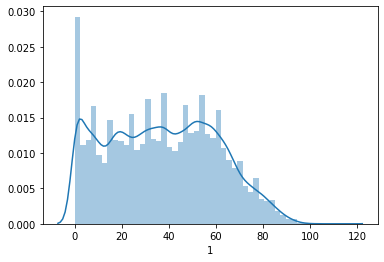

In [35]:
#Age
sns.distplot(dataset[1])

We can see that most of the patients are of the age group 0-60.<br/>As the age increases the patients of that category are seen less.

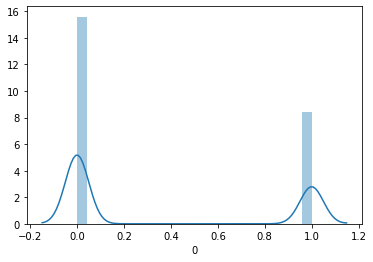

In [37]:
#Gender
sns.distplot(dataset[0])

Looking at the graph above we can see that the frequency of Female is greater than the Male patients

# Bivariate plots

Text(0.5, 1.0, 'Scatter plot of Age vs Date of month')

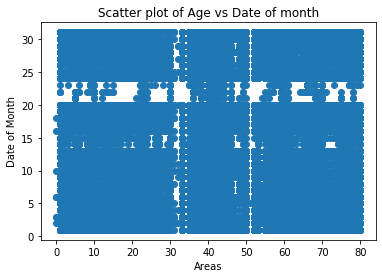

In [44]:
#Age vs Date of month
plt.scatter(x=dataset[2],y=dataset[10])
plt.xlabel('Areas')
plt.ylabel('Date of Month')
plt.title('Scatter plot of Age vs Date of month')

From above we observe two things<br/>The dates around 20-25 have lesser appointments than the other days.<br/>And second the people in area around 31-33 and 51/52 also have comparatively lesser appointments.

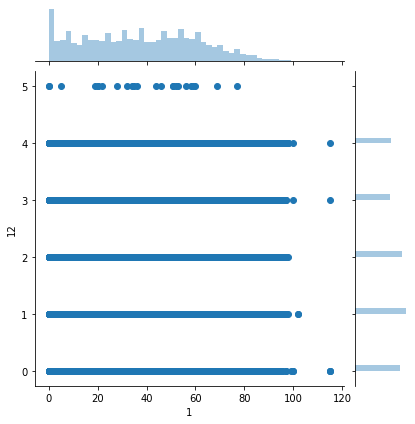

In [49]:
sns.jointplot(x=dataset[1],y=dataset[12])

Looking at the graph above we can see that there are no appointments on sunday which could mean that the clinic is closed on that day.

We also see that there are few people on saturday.

And the highest frequency of people is seen on Monday, Tuesday and Wednesday.

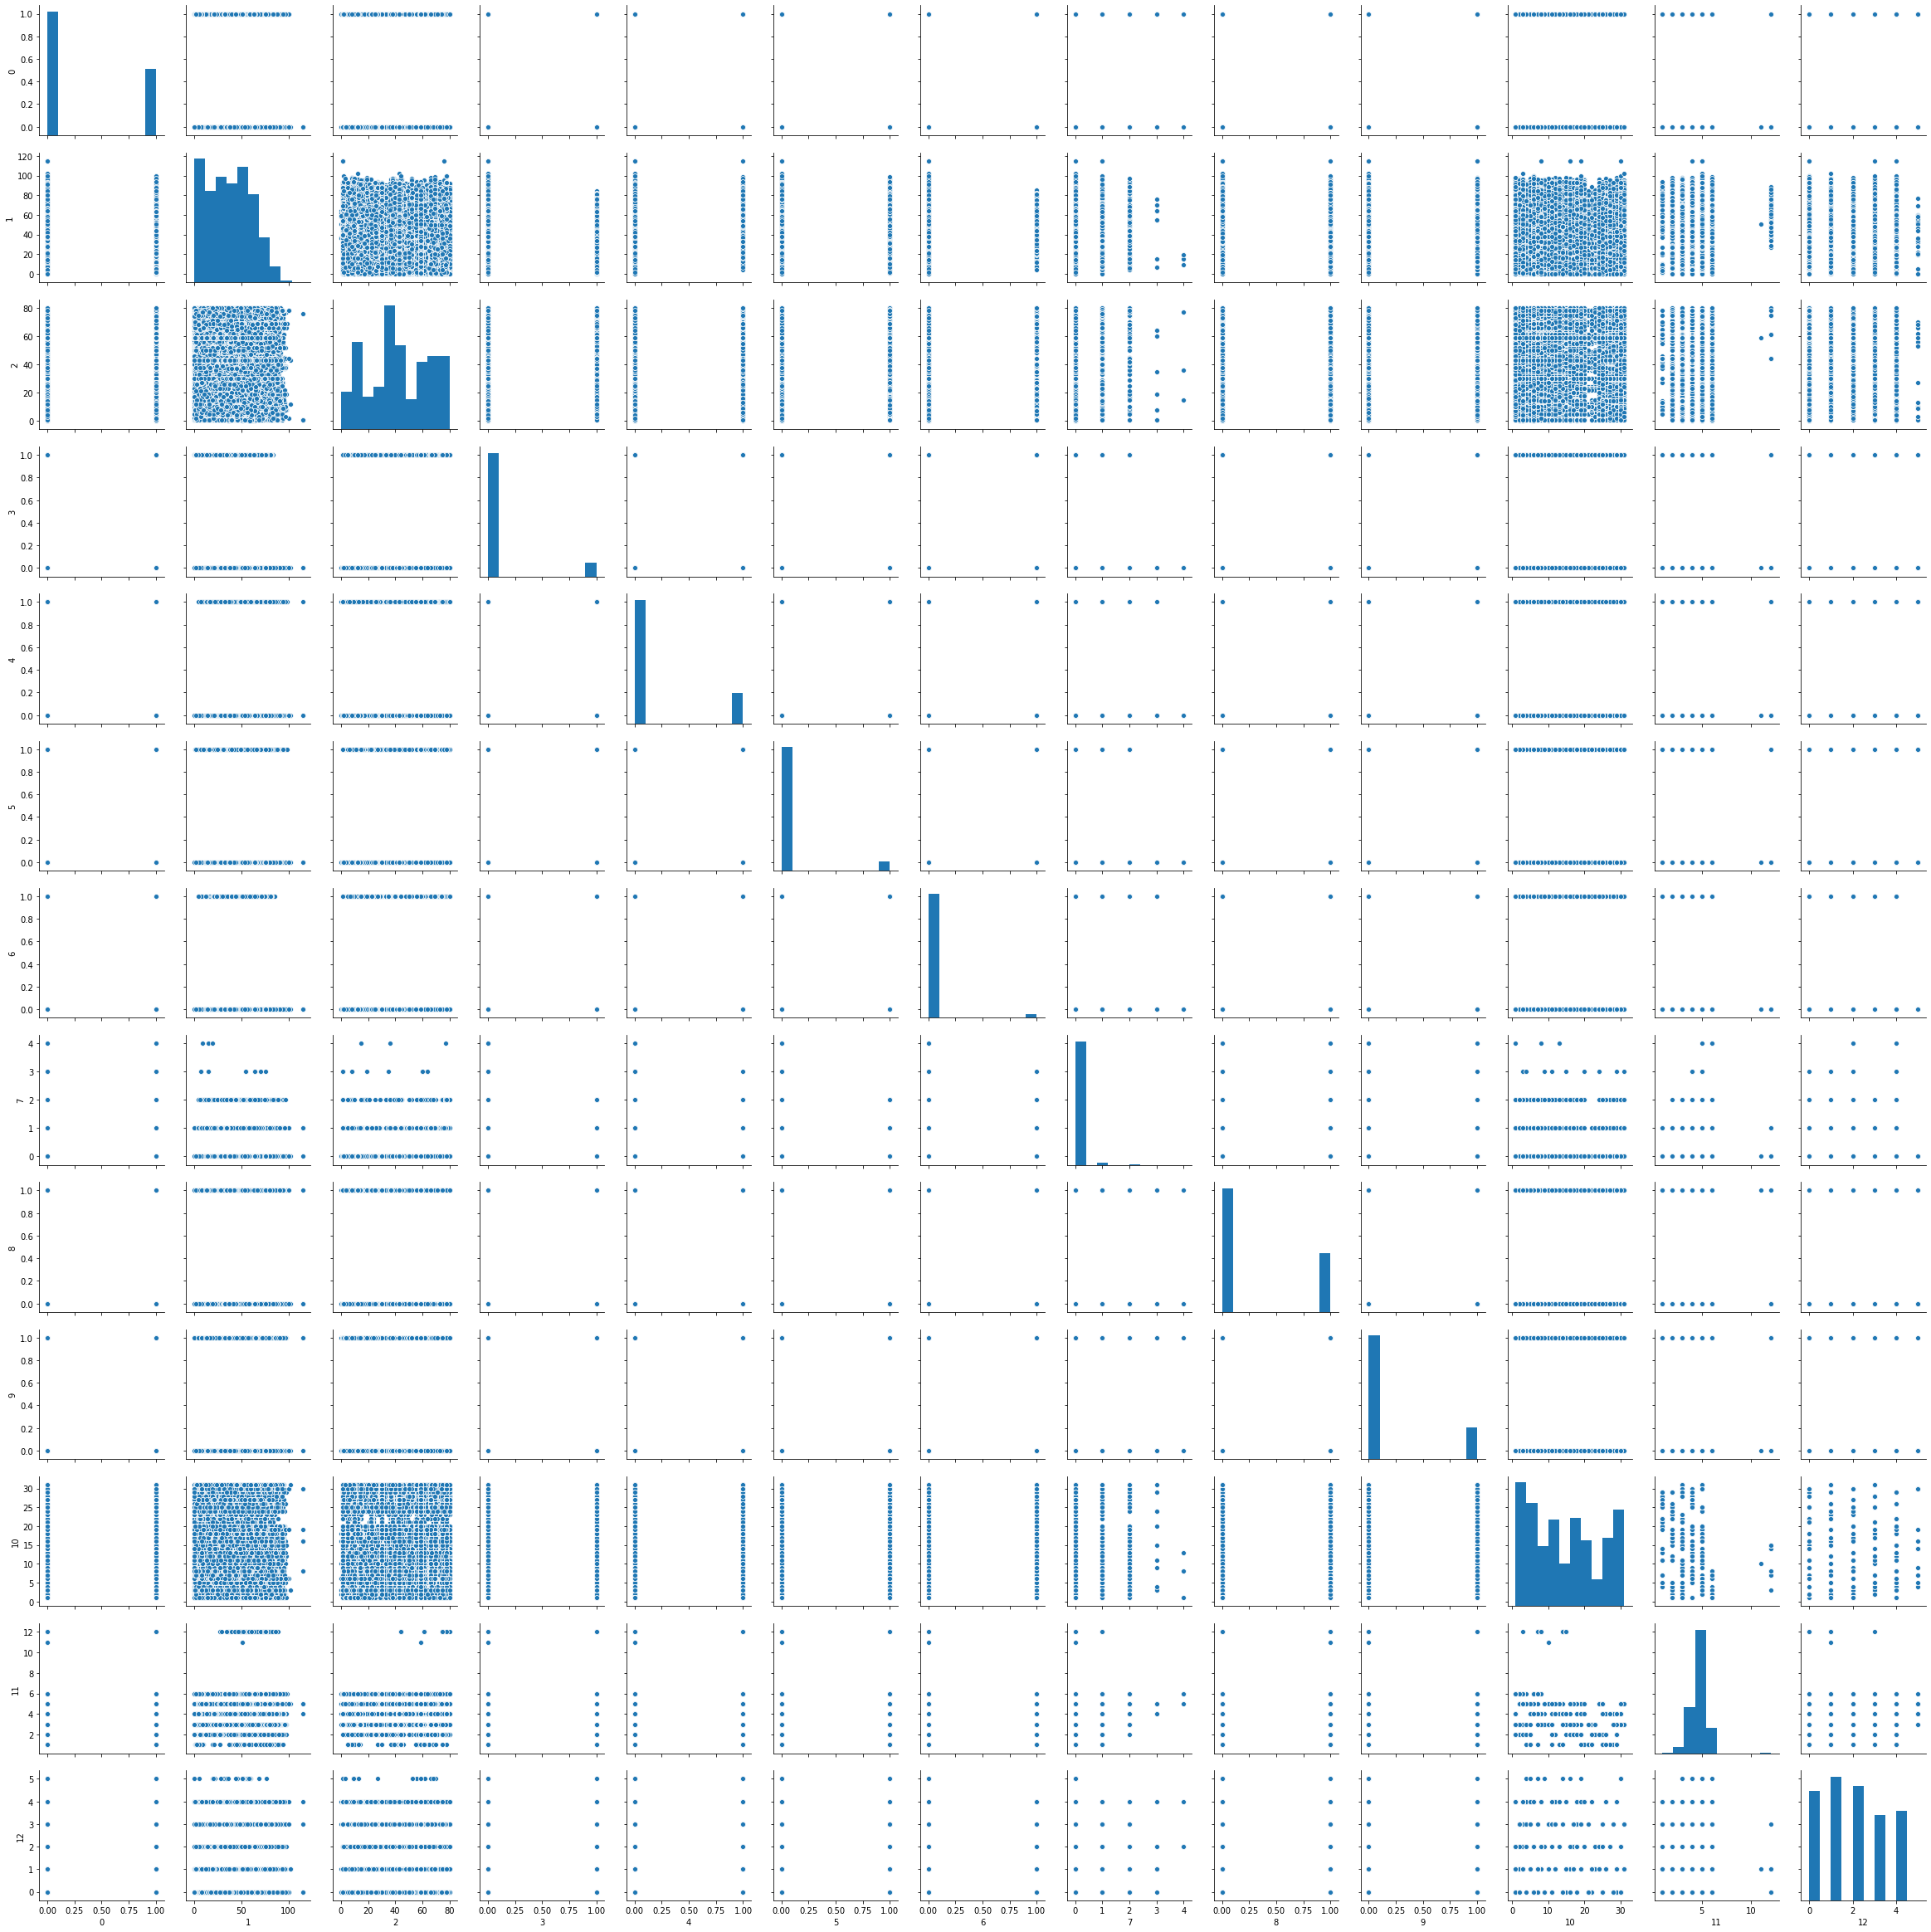

In [51]:
sns.pairplot(dataset)

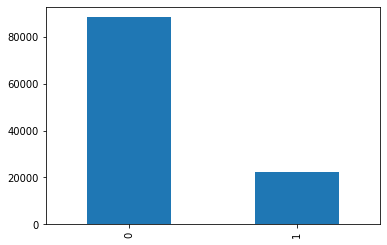

In [66]:
#Bar graph of No-show
dataset[9].value_counts().plot.bar()

We can see that around 85000 people are No-show and around 25000 are Show.

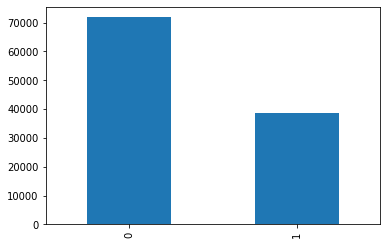

In [67]:
#Bar graph of Gender
dataset[0].value_counts().plot.bar()

0 here corresponds to Male so we can see that there are more male patients that the female(1)

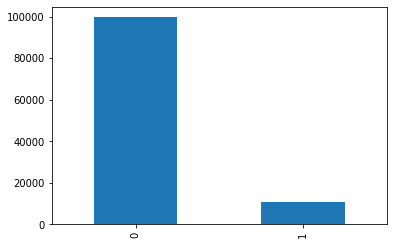

In [69]:
dataset[3].value_counts().plot.bar()

This graph above is of scholarship. We have more people without scholarship and a few with scholarship.

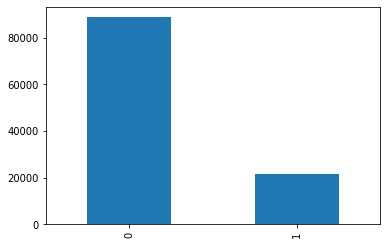

In [70]:
dataset[4].value_counts().plot.bar()

The above graph is of Hypertension. we can see that there are fewer patients with Hypertension.

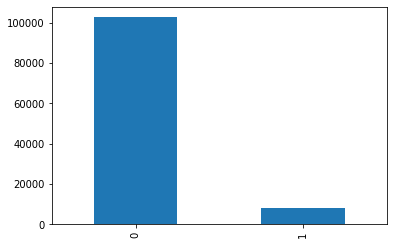

In [71]:
dataset[5].value_counts().plot.bar()

So this graph is about people with diabetes. fewer patients have diabetes.

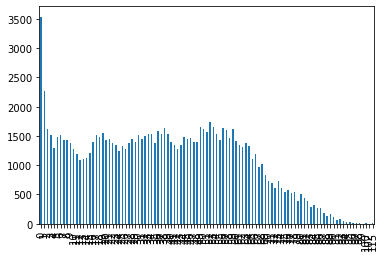

In [79]:
dataset[1].value_counts().sort_index().plot.bar()

people of age 0-60 have higher appointments than those with age higher than that.

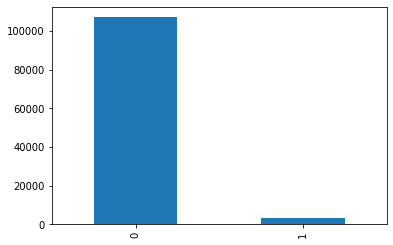

In [76]:
dataset[6].value_counts().plot.bar()

Very few people with alcoholism.

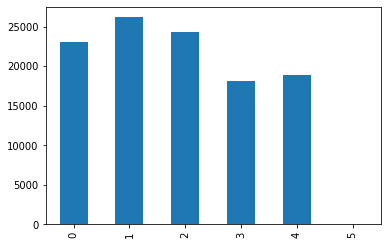

In [81]:
dataset[12].value_counts().sort_index().plot.bar()

very few appointments on saturday and no appointments on Sunday.

# Feature selection

In [95]:
X=X.drop([0,6,7,11], axis=1)
X.head()

,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Handicap,Date,DayofWeek
0,62,39,0,1,0,0,29,4
1,56,39,0,0,0,0,29,4
2,62,45,0,0,0,0,29,4
3,8,54,0,0,0,0,29,4
4,56,39,0,1,1,0,29,4


In [88]:
X.rename(columns={1:'Age',2:'Neighbourhood'},inplace=True)

In [89]:
X.rename(columns={3:'Scholarship',4:'Hypertension',5:'Diabetes',8:'Handicap',9:'Date',10:'DayofWeek'},inplace=True)

In [109]:
X=X.astype(int)
X.head()

,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Handicap,Date,DayofWeek
0,62,39,0,1,0,0,29,4
1,56,39,0,0,0,0,29,4
2,62,45,0,0,0,0,29,4
3,8,54,0,0,0,0,29,4
4,56,39,0,1,1,0,29,4


In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [126]:
X_train3, X_test3, y_train3, y_test3=train_test_split(X,y,test_size=0.3,random_state=42)

In [127]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)
X_train3=sc_X.fit_transform(X_train3)
X_test3=sc_X.transform(X_test3)

In [128]:
from sklearn.linear_model import LogisticRegression
classifier1=LogisticRegression(random_state = 42)
classifier1.fit(X_train,y_train)

C:\Users\Eshika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [129]:
y_pred1 = classifier1.predict(X_test)

In [130]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [131]:
y_pred2 = tree.predict(X_test)

In [143]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)

[[17603    66]
 [ 4400    37]]


In [144]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

[[14734  2935]
 [ 3236  1201]]


In [134]:
classifier2=LogisticRegression(random_state = 42)
classifier2.fit(X_train3,y_train3)

C:\Users\Eshika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [135]:
y_pred3 = classifier2.predict(X_test3)

In [145]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test3, y_pred3)
print(cm3)

[[26426    99]
 [ 6584    50]]


In [139]:
tree2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
tree2.fit(X_train3, y_train3)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [140]:
y_pred4 = tree2.predict(X_test3)

In [146]:
from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(y_test3, y_pred4)
print(cm4)

[[21984  4541]
 [ 4807  1827]]


In [150]:
x1=100*(cm1[0][0]+cm1[1][1])/np.sum(cm1)
x2=100*(cm2[0][0]+cm2[1][1])/np.sum(cm2)
x3=100*(cm3[0][0]+cm3[1][1])/np.sum(cm3)
x4=100*(cm4[0][0]+cm4[1][1])/np.sum(cm4)

In [151]:
print("Accuracy of Logistic regression with 80:20 train test split is ",x1)
print("Accuracy of Decision Tree regression with 80:20 train test split is ",x2)
print("Accuracy of Logistic regression with 70:30 train test split is ",x3)
print("Accuracy of Decision Tree regression with 70:30 train test split is ",x4)

Accuracy of Logistic regression with 80:20 train test split is  79.79734008866372
Accuracy of Decision Tree regression with 80:20 train test split is  72.08450194517326
Accuracy of Logistic regression with 70:30 train test split is  79.84559244850568
Accuracy of Decision Tree regression with 70:30 train test split is  71.80855876232697


We can see that Logistic regression gives us a better accuracy than Decision Tree Regression and we can also see that there is not a huge difference in accuracy when the train test split is varied by a small difference of 10%. On the other hand if we would have take a train test split of 60:40 of 50:50 then that would give us a greater difference in accuracy.